In [1]:
import numpy as np
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

# from pvalue_metric import metric #some diffrences as __file__ is not defined for jupyter notebooks
import sys
import os
PACKAGE_DIR = Path(os.getcwd()).resolve().parents[0] / 'pvalue_metric'
sys.path.append(str(PACKAGE_DIR))
import metric

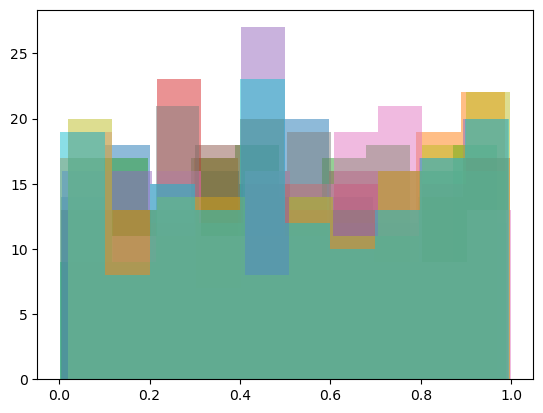

In [2]:
#check p metric performance here and also estimated mean
itr = 10
n_bootstrap = 150
n_permutation = 200
sample_size = 50

pvalues = np.zeros(itr)
bootstrapped_pvalues = np.zeros((itr, n_bootstrap))
pmetric = np.zeros(itr)

for i in range(itr):

    g1_samples = np.random.normal(loc = 0, scale = 1, size=sample_size)
    g2_samples = np.random.normal(loc = 0, scale = 1, size=sample_size)

    g1_unpooled = g1_samples - g1_samples.mean()
    g2_unpooled = g2_samples - g2_samples.mean() 

    g1_bootstraps = [np.random.choice(g1_unpooled,len(g1_samples), replace=True) for j in range(n_bootstrap)]
    g2_bootstraps = [np.random.choice(g2_unpooled, len(g2_samples), replace=True) for j in range(n_bootstrap)]
    bootstrapped_pvalues[i,:] = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

    pvalues[i] = stats.ttest_ind(g1_samples,g2_samples)[1]
    plt.hist(bootstrapped_pvalues[i], alpha=0.5, label='pvalues')
    

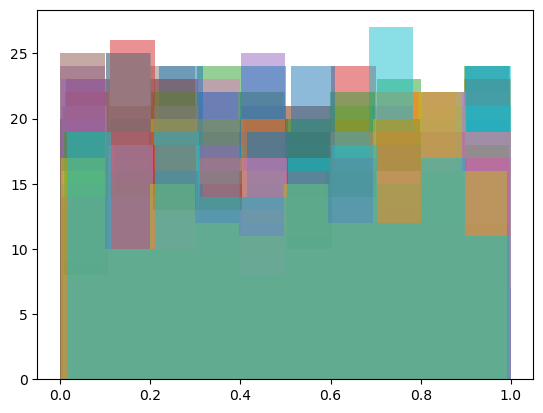

In [3]:
#check p metric performance here and also estimated mean
itr = 100
n_bootstrap = 150
n_permutation = 200
sample_size = 50

pvalues = np.zeros(itr)
bootstrapped_pvalues = np.zeros((itr, n_bootstrap))
pmetric = np.zeros( itr)

for i in range(itr):

    g1_samples = np.random.normal(loc = 0, scale = 1, size=sample_size)
    g2_samples = np.random.normal(loc = 2, scale = 1, size=sample_size)

    g1_unpooled = g1_samples - g1_samples.mean() + np.concatenate((g1_samples, g2_samples)).mean()
    g2_unpooled = g2_samples - g2_samples.mean() + np.concatenate((g1_samples, g2_samples)).mean()

    g1_bootstraps = [np.random.choice(g1_unpooled,len(g1_samples), replace=True) for j in range(n_bootstrap)]
    g2_bootstraps = [np.random.choice(g2_unpooled, len(g2_samples), replace=True) for j in range(n_bootstrap)]
    bootstrapped_pvalues[i,:] = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

    pvalues[i] = stats.ttest_ind(g1_samples,g2_samples)[1]
    plt.hist(bootstrapped_pvalues[i], alpha=0.5, label='pvalues')
    

In [4]:
np.mean(pvalues)

1.0144006797473547e-12

In [7]:
np.mean(bootstrapped_pvalues, axis=1)

array([0.49464748, 0.48516757, 0.50036378, 0.50587276, 0.52596181,
       0.50149828, 0.46853313, 0.48051863, 0.50240476, 0.55214276,
       0.52580465, 0.53423878, 0.52833264, 0.46915783, 0.51863945,
       0.5124798 , 0.50465213, 0.49424887, 0.48400131, 0.51594063,
       0.49160845, 0.51492513, 0.4775983 , 0.52395533, 0.47149685,
       0.51360649, 0.50244804, 0.50790915, 0.49018526, 0.5153348 ,
       0.5110268 , 0.52350502, 0.49876704, 0.48845339, 0.50276272,
       0.4983739 , 0.4788785 , 0.49750699, 0.50038757, 0.53495096,
       0.51200027, 0.467229  , 0.51008463, 0.47828646, 0.4508882 ,
       0.4544795 , 0.49949967, 0.44516469, 0.46451165, 0.53102572,
       0.50947487, 0.49081426, 0.47916079, 0.44340225, 0.50157452,
       0.45200883, 0.52815583, 0.45937555, 0.52225592, 0.47506508,
       0.46265203, 0.51968522, 0.52469147, 0.48192704, 0.48039881,
       0.47280763, 0.49143242, 0.50289807, 0.46737876, 0.54536981,
       0.55141831, 0.49943809, 0.47766396, 0.48129858, 0.51469